<a href="https://colab.research.google.com/github/Acottle1031/Sales-Predictions-Project/blob/main/SalesProjectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring & Cleaning Data

In [1]:
# Take care of our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
set_config(display='diagram')

In [2]:
# Displaying data & creating copy for preprocessing
projections_df = pd.read_csv('/content/drive/MyDrive/01 Week 1 - Python/Data Sets/sales_predictions.csv')
projections_df2 = projections_df.copy()
projections_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Using df.shape we can see there are 8523 rows and 12 columns
projections_df.shape

(8523, 12)

In [4]:
# Using df.dtypes we can see the individual data type for each variable
projections_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# By using df.duplicated().sum() we can have pandas go through all rows to check for duplicates
# Here we can see there are no duplicates
projections_df.duplicated().sum()


0

In [6]:
# By using .isna().sum() we can see the total number of missing values per column,
# 1463 missing values in Item_Weight and 2410 missing in Outlet_Size
projections_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Outlet_Size is missing a lot of data, but could be useful so we'll keep the column
# We'll want to impute the average outlet size into the missing value spaces
# Item_weight also has a lot of missing values and may possibly be useful for projections so we'll also keep this
# Same thing as with Outlet_Size, we'll impute the average weight
outlet_size_average = projections_df['Outlet_Size'].mode().iloc[0]
item_weight_average = projections_df['Item_Weight'].mode
projections_df['Outlet_Size'].fillna(outlet_size_average, inplace=True)
projections_df['Item_Weight'].fillna(item_weight_average, inplace=True)

In [8]:
# Like before, using .isna().sum() we can see the total number of all missing values in our dataframe after changes
projections_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
# Using .value_counts we can see that there are multiple examples of Regular and Low Fat (LF, reg, low fat)
projections_df.value_counts('Item_Fat_Content')


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

In [10]:
# We'll want to change those to match the already existing values
projections_df['Item_Fat_Content'].value_counts()
projections_df['Item_Fat_Content'] = projections_df['Item_Fat_Content'].replace('LF', 'Low Fat')
projections_df['Item_Fat_Content'] = projections_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
projections_df['Item_Fat_Content'] = projections_df['Item_Fat_Content'].replace('reg', 'Regular')
projections_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
# Using df.describe we can see a summary of numerical columns including min, max, mean
projections_df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


#Visualizing Our Data 

Here I'll  provide a statistical analysis of our data that may help, understand, model, or explain our data. I'll attempt to provide visualizations for easier viewing

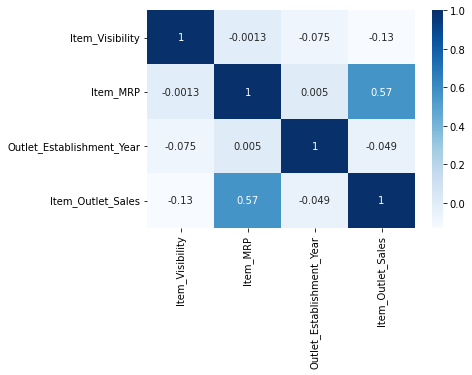

In [12]:
# Starting with a correlation heat map to see what data might correlate to each other for further exploration if needed
# Here we see in regards to sales the only metric with a positive correlation is Item_MRP 
# We also see that the year established has a negative correlation with sales
# Additionally, it looks like the Outlet establishment year has a severely negative correlation with Item Visibility
corr = projections_df.corr()
sns.heatmap(corr, cmap='Blues', annot = True);

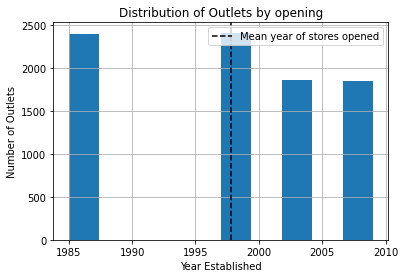

In [13]:
# Next we'll do a Histogram to check out distribution of outlets by opening year
mean = projections_df['Outlet_Establishment_Year'].mean()
ax = projections_df['Outlet_Establishment_Year'].hist();
ax.set(xlabel = 'Year Established', ylabel = 'Number of Outlets', title = 'Distribution of Outlets by opening');
ax.axvline(mean, color='k', ls='--', label = f'Mean year of stores opened')
ax.legend();


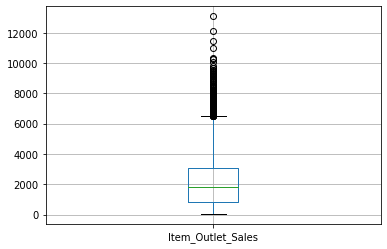

In [14]:
projections_df.boxplot('Item_Outlet_Sales');
#using a box plot for sales to show a summary of our sales data
#We see that 0 would be our minimum sales, our 25th percentile of our stores are between $1000 - $1900
#Our median sales just under $2000 per store 
#75th percentile is about $2000-$3000 
#Our max is about $6500 in sales with anything after that being an outlier 

#Explaining Our Data

Here I'm going to attempt to build visualizations in order to answer a couple of direct questions. Firstly, how have sales changed over time, and secondly which types of items are making the most money.

*Q1*: How have sales changed over time?

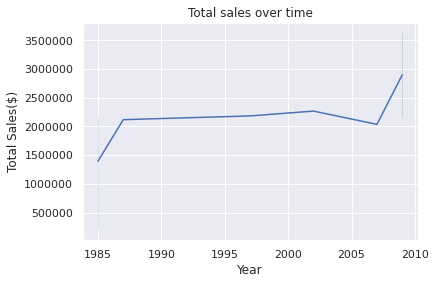

In [15]:
sales_ot = projections_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
sns.set(style='darkgrid')
ax = sns.lineplot(data=projections_df, x='Outlet_Establishment_Year', y=sales_ot)
plt.ticklabel_format(style='plain')
ax.set(title='Total sales over time', xlabel='Year', ylabel='Total Sales($)');
# We can see that sales overall have increased over time, beginning at $1.5 million and increasing to about $2.9 million

Q2: Which types of items are making the most money?





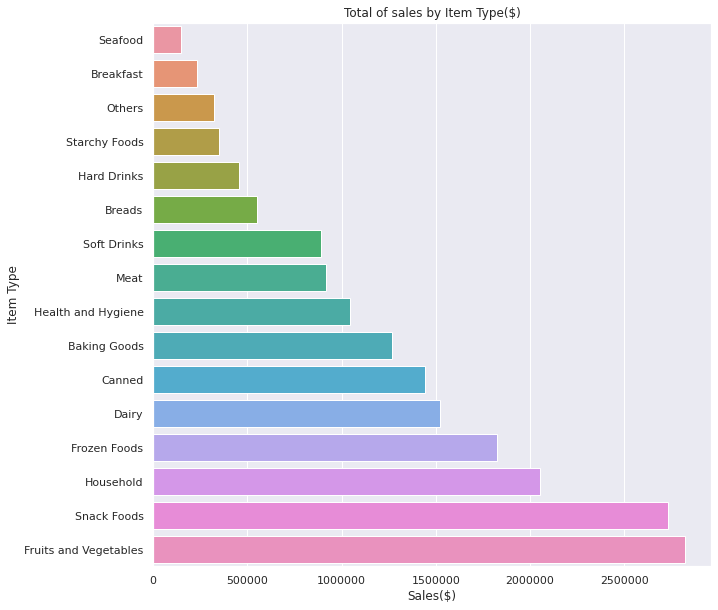

In [16]:
plt.figure(figsize=(10,10))
item_sales_type = projections_df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()
ax = sns.barplot(data=projections_df, x=item_sales_type.values, y=item_sales_type.index, ci=None);
sns.set(style='darkgrid')
ax.set(title='Total of sales by Item Type($)', xlabel='Sales($)', ylabel='Item Type');
ax.get_xaxis().get_major_formatter().set_scientific(False)
# We can see here that Fruits & Vegetables are making the most with, Snack foods in a close 2nd

# Data split & PreProcessing

Here we will be splitting our data and creating a preprocessing object in order to get our data ready for modeling, keeping data leakage in mind. we will use SimpleImputer to impute the missing values we originally imputed ourselves in our original DataFrame. Our Target vector here will be "Item_Outlet_Sales."




 


In [17]:
# Viewing our data copy we made earlier 
projections_df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
# Showing missing values are still in place as they were above 
projections_df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# Checking for duplicates as we did above
projections_df2.duplicated().sum()

0

In [20]:
# Splitting the data
X = projections_df2.drop(columns='Item_Outlet_Sales')
y = projections_df2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Instantiating Transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
mean_imputer = SimpleImputer(strategy='mean')
most_freq_imputer = SimpleImputer(strategy='most_frequent')

In [22]:
# Creating Pipelines
number_pipe = make_pipeline(mean_imputer, scaler)
nominal_pipe = make_pipeline(most_freq_imputer, ohe)


In [23]:
# Creating Tuples to match to pipelines
number_selector = make_column_selector(dtype_include='number')
nom_cols = ['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
number_tuple = (number_pipe, number_selector)
nominal_tuple = (nominal_pipe, nom_cols)

In [24]:
# Creating Preprocessing Object, fitting to data, and transforming data
preprocessor = make_column_transformer(number_tuple, nominal_tuple)
preprocessor.fit(X_train, y_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Models & Metrics

I'll start by creating and evaluating a Linear Regression model, based on R2 Score and RMSE score

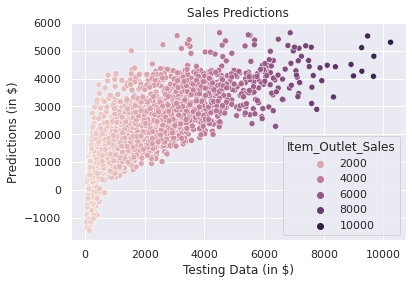

In [25]:
# Instantiating model, creating pipeline, fitting, and creating predictions
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(scaler, lin_reg)
lin_reg_pipe.fit(X_train_processed, y_train)
train_pred = lin_reg_pipe.predict(X_train_processed)
test_pred = lin_reg_pipe.predict(X_test_processed)
ax = sns.scatterplot(x= y_test, y= test_pred, hue= y_test, alpha=1, legend='brief');
ax.set(title= 'Sales Predictions', xlabel= 'Testing Data (in $)', ylabel= 'Predictions (in $)',);

In [26]:
# Evaluation based on r^2
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Train r2 Score: {train_r2}')
print(f'Test r2 Score: {test_r2}')

Train r2 Score: 0.5609504845618722
Test r2 Score: 0.5675484646290592


In [27]:
# Evaluation based on RMSE, I'll calculate MSE first, then use np.sqrt 
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Train RMSE Score: {train_RMSE}')
print(f'Test RMSE Score: {test_RMSE}')

Train RMSE Score: 1139.8892898141419
Test RMSE Score: 1092.3021395957903


Next, I'll build a Regression Tree Model and evaluate it using the same metrics, R2 and RMSE.

In [28]:
# Creating regression tree, fitting, and creating predictions
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train_processed, y_train)
regtree_train_pred = reg_tree.predict(X_train_processed)
regtree_test_pred = reg_tree.predict(X_test_processed)

In [29]:
# Comparing performance based on r^2
tree_train_score = reg_tree.score(X_train_processed, y_train)
tree_test_score = reg_tree.score(X_test_processed, y_test)
print(f'r2 Train Score: {tree_train_score}')
print(f'r2 Test Score: {tree_test_score}')

r2 Train Score: 1.0
r2 Test Score: 0.21883810878478083


In [30]:
# Comparing based on RMSE, just like before, I'll calculate MSE for this first
tree_train_MSE = mean_squared_error(y_train, train_pred)
tree_test_MSE = mean_squared_error(y_test, test_pred)
tree_train_RMSE = np.sqrt(tree_train_MSE)
tree_test_RMSE = np.sqrt(tree_test_MSE)
print(f'Train RMSE Score: {tree_train_RMSE}')
print(f'Test RMSE Score: {tree_test_RMSE}')

Train RMSE Score: 1139.8892898141419
Test RMSE Score: 1092.3021395957903


In [31]:
# Starting by getting Hyperparamaters
reg_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [32]:
# Lets look at the max depth
reg_tree.get_depth()

40

In [33]:
# Creating range and Data Frame for tuned scores, creating predictions
reg_tree2_max_depth = range(2 , 40)
reg_tree2_df = pd.DataFrame(index=reg_tree2_max_depth, columns=['Training Score', 'Testing Score'])
for depth in reg_tree2_max_depth:
  reg_tree2 = DecisionTreeRegressor(max_depth=depth, random_state=42)
  reg_tree2.fit(X_train_processed, y_train)
  reg_tree2_train_pred = reg_tree2.predict(X_train_processed)
  reg_tree2_test_pred = reg_tree2.predict(X_test_processed)
  reg_tree2_train_score = reg_tree2.score(X_train_processed, y_train)
  reg_tree2_test_score = reg_tree2.score(X_test_processed, y_test)
  reg_tree2_df.loc[depth,'Training Score'] = reg_tree2_train_score
  reg_tree2_df.loc[depth,'Testing Score'] = reg_tree2_test_score
reg_tree2_df.sort_values(by='Testing Score', ascending=False)

,Training Score,Testing Score
5,0.603921,0.594685
6,0.614866,0.584902
4,0.582625,0.584005
7,0.626737,0.578346
8,0.642486,0.564574
9,0.661969,0.544985
3,0.524218,0.524222
10,0.683052,0.523016
11,0.707801,0.507041
12,0.73456,0.482884


In [34]:
# Huge difference after tuning! This has a comparable R2 score to our Linear Regression model
# Lets create, and evaluate this model, starting with R2
regtree_tuned = DecisionTreeRegressor(max_depth=5, random_state=42)
regtree_tuned.fit(X_train_processed, y_train)
regtree_tuned_train_pred = regtree_tuned.predict(X_train_processed)
regtree_tuned_test_pred = regtree_tuned.predict(X_test_processed)
regtree_tuned_train_score = regtree_tuned.score(X_train_processed, y_train)
regtree_tuned_test_score = regtree_tuned.score(X_test_processed, y_test)
print(f'Tuned Regression Tree R2 Training Score:{regtree_tuned_train_score}')
print(f'Tuned Regression Tree R2 Testing Score:{regtree_tuned_test_score}')

Tuned Regression Tree R2 Training Score:0.603920610161473
Tuned Regression Tree R2 Testing Score:0.5946848986383744


In [35]:
# Evaluating based on RMSE, like before, we'll calculate MSE first
tree_train_MSE = mean_squared_error(y_train, train_pred)
tree_test_MSE = mean_squared_error(y_test, test_pred)
tree_train_RMSE = np.sqrt(tree_train_MSE)
tree_test_RMSE = np.sqrt(tree_test_MSE)
print(f'Train RMSE Score: {tree_train_RMSE}')
print(f'Test RMSE Score: {tree_test_RMSE}')

Train RMSE Score: 1139.8892898141419
Test RMSE Score: 1092.3021395957903


In [36]:
# Now we'll evaluate based on RMSE like we did with our Linear Regression
regtree_tuned_train_MSE = mean_squared_error(y_train, regtree_tuned_train_pred)
regtree_tuned_test_MSE = mean_squared_error(y_test, regtree_tuned_test_pred)
regtree_tuned_train_RMSE = np.sqrt(regtree_tuned_train_MSE)
regtree_tuned_test_RMSE = np.sqrt(regtree_tuned_test_MSE)
print(f'Regression Tree Training RMSE Score: {regtree_tuned_train_RMSE}')
print(f'Regression Tree Tuned Test RMSE Score: {regtree_tuned_test_RMSE}')

Regression Tree Training RMSE Score: 1082.6723464202025
Regression Tree Tuned Test RMSE Score: 1057.4758432521178


In [37]:
# Okay this has been a lot of evaluation, lets put these scores in closer cells for an easier read
print('Linear Regression R2 Training & Testing Scores:')
print(f'Train r2 Score: {train_r2}')
print(f'Test r2 Score: {test_r2}')
print('Linear Regression RMSE Training & Testing Scores:')
print(f'Train RMSE Score: {train_RMSE}')
print(f'Test RMSE Score: {test_RMSE}')

Linear Regression R2 Training & Testing Scores:
Train r2 Score: 0.5609504845618722
Test r2 Score: 0.5675484646290592
Linear Regression RMSE Training & Testing Scores:
Train RMSE Score: 1139.8892898141419
Test RMSE Score: 1092.3021395957903


In [38]:
print('Tuned Regression Tree R2 Training & Testing Scores:')
print(f'Regression Tree R2 Training Score:{regtree_tuned_train_score}')
print(f'Regression Tree R2 Testing Score:{regtree_tuned_test_score}')
print('Tuned Regression Tree RMSE Training & Testing Scores:')
print(f'Regression Tree Training RMSE Score: {regtree_tuned_train_RMSE}')
print(f'Regression Tree Tuned Test RMSE Score: {regtree_tuned_test_RMSE}')

Tuned Regression Tree R2 Training & Testing Scores:
Regression Tree R2 Training Score:0.603920610161473
Regression Tree R2 Testing Score:0.5946848986383744
Tuned Regression Tree RMSE Training & Testing Scores:
Regression Tree Training RMSE Score: 1082.6723464202025
Regression Tree Tuned Test RMSE Score: 1057.4758432521178


##Overall, I recommend the Regression Tree Model for this 

after comparing the models and tuning, I would recommend a Regression Tree for this data

* Justification:

Comparing the two models based on both RMSE and R2 scores shows that both models are relatively balanced. However, after tuning, the Regression Tree performs better on both training AND testing data, for both R2 and RMSE. This leads me to believe that this model would be the superior choice in this case